In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
h = 2 ** (-4)
x_start = 0
x_final = 2 * np.pi
N_x = int(round((x_final - x_start) / h))

k = 0.5 * h
t_start = 0
t_final = 1
N_t = int(round((t_final - t_start) / k))

x = np.linspace(x_start, x_final, N_x + 1)
t = np.linspace(t_start, t_final, N_t + 1)
X, T = np.meshgrid(x, t)

In [120]:
def f(x):
    x = x % (2 * np.pi)
    return np.where(x <= np.pi, x, (2 * np.pi) - x)

In [121]:
def forward_diff(u, h):
    return (np.roll(u, 1) - u) / h

def backward_diff(u, h):
    return (u - np.roll(u, -1)) / h

def center_diff(u, h):
    return (np.roll(u, 1) - np.roll(u, -1)) / (2 * h)

# Downwind Method

$$
\begin{align}
    v_j^{n+1} &= v_j^n + \frac{k}{h} (v_j^n - v_{j-1}^n)\\
    v_j^0 &= f_j
\end{align}
$$

In [122]:
u = np.zeros((N_t + 1, N_x + 1))
u[0] = f(x)

for n in range(N_t):
    u[n + 1] = u[n] + (k * backward_diff(u[n], h))

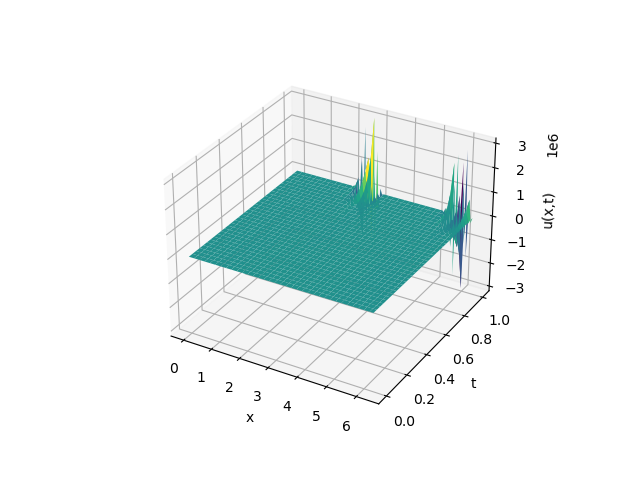

In [123]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(X, T, u, cmap="viridis")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

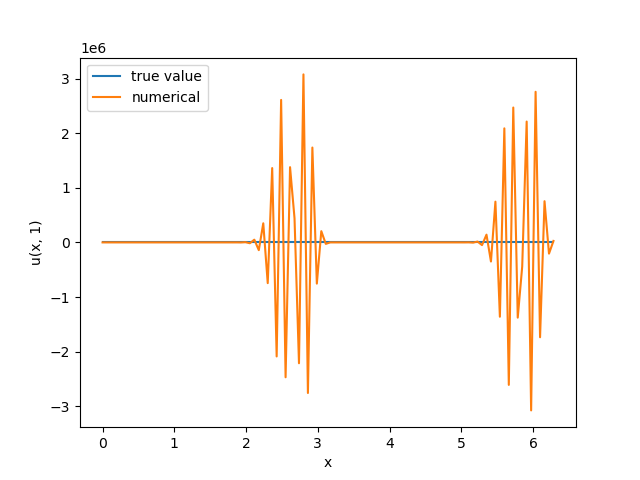

In [124]:
fig, ax = plt.subplots()
ax.plot(x, f(x - 1), label="true value")
ax.plot(x, u[-1], label="numerical")
ax.set_xlabel('x')
ax.set_ylabel('u(x, 1)')
ax.legend()
plt.show()

# Upwind Method

$$
\begin{align}
    v_j^{n+1} &= v_j^n + \frac{k}{h} (v_{j + 1}^n - v_j^n)\\
    v_j^0 &= f_j
\end{align}
$$

In [125]:
u = np.zeros((N_t + 1, N_x + 1))
u[0] = f(x)

for n in range(N_t):
    u[n + 1] = u[n] + (k * forward_diff(u[n], h))

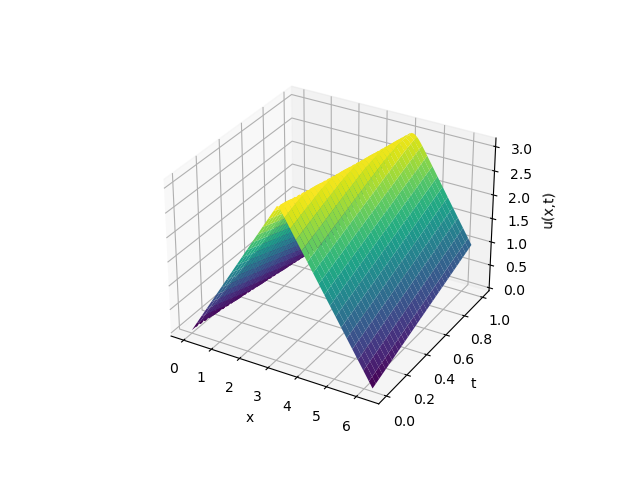

In [126]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(X, T, u, cmap="viridis")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

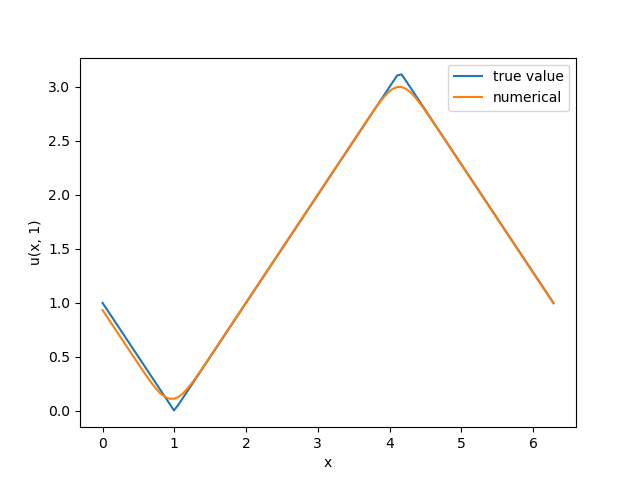

In [127]:
fig, ax = plt.subplots()
ax.plot(x, f(x - 1), label="true value")
ax.plot(x, u[-1], label="numerical")
ax.set_xlabel('x')
ax.set_ylabel('u(x, 1)')
ax.legend()
plt.show()

# Center Method

$$
\begin{align}
    v_j^{n+1} &= v_j^n + \frac{k}{2h} (v_{j + 1}^n - v_{j - 1}^n)\\
    v_j^0 &= f_j
\end{align}
$$

In [128]:
u = np.zeros((N_t + 1, N_x + 1))
u[0] = f(x)

for n in range(N_t):
    u[n + 1] = u[n] + (k * center_diff(u[n], h))

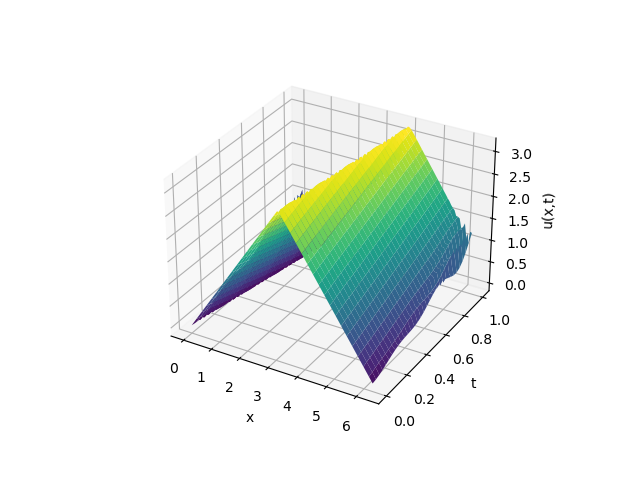

In [129]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(X, T, u, cmap="viridis")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

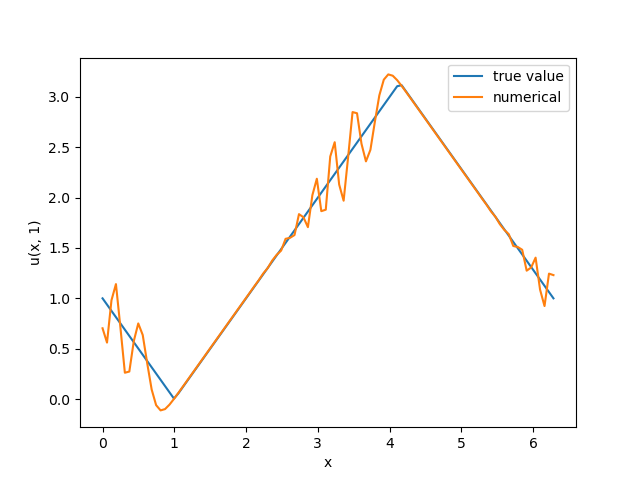

In [130]:
fig, ax = plt.subplots()
ax.plot(x, f(x - 1), label="true value")
ax.plot(x, u[-1], label="numerical")
ax.set_xlabel('x')
ax.set_ylabel('u(x, 1)')
ax.legend()
plt.show()

# Lax-Wendroff Method

$$
\begin{align}
    v_j^{n+1} &= (I + kD_0)v_j^n + \frac{k^2}{2} D_+ D_- v_j^n & j \in \mathbb Z, n \ge 0\\
    v_j^0 &= f_j & j \in \mathbb Z
\end{align}
$$

In [131]:
u = np.zeros((N_t + 1, N_x + 1))
u[0] = f(x)

for n in range(N_t):
    u[n + 1] = u[n] + (k * center_diff(u[n], h)) + (0.5 * k**2 * forward_diff(u[n], h) * backward_diff(u[n], h))

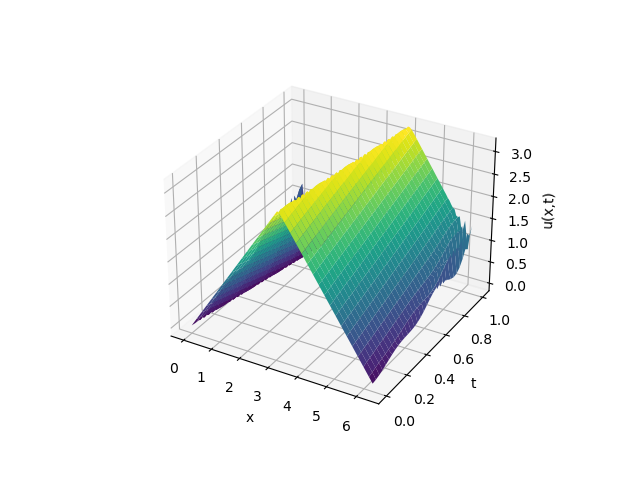

In [132]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(X, T, u, cmap="viridis")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

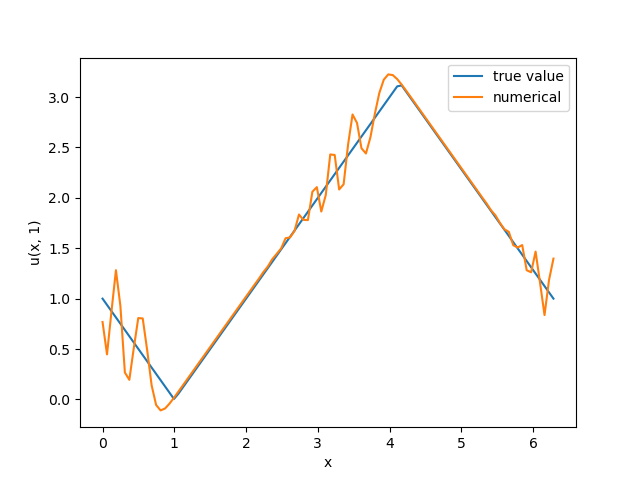

In [133]:
fig, ax = plt.subplots()
ax.plot(x, f(x - 1), label="true value")
ax.plot(x, u[-1], label="numerical")
ax.set_xlabel('x')
ax.set_ylabel('u(x, 1)')
ax.legend()
plt.show()

# Lax-Friedrich Method

$$
\begin{align}
    v_j^{n+1} &= (I + kD_0)v_j^n + \frac{h^2}{2} D_+ D_- v_j^n & j \in \mathbb Z, n \ge 0\\
    v_j^0 &= f_j & j \in \mathbb Z
\end{align}
$$

In [134]:
u = np.zeros((N_t + 1, N_x + 1))
u[0] = f(x)

for n in range(N_t):
    u[n + 1] = u[n] + (k * center_diff(u[n], h)) + (0.5 * h**2 * forward_diff(u[n], h) * backward_diff(u[n], h))

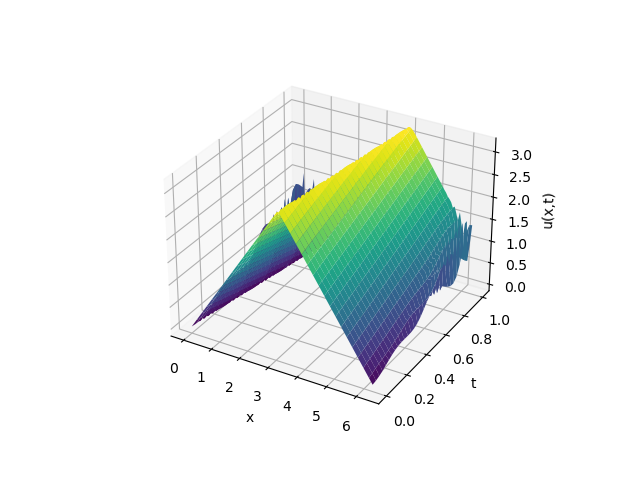

In [135]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(X, T, u, cmap="viridis")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

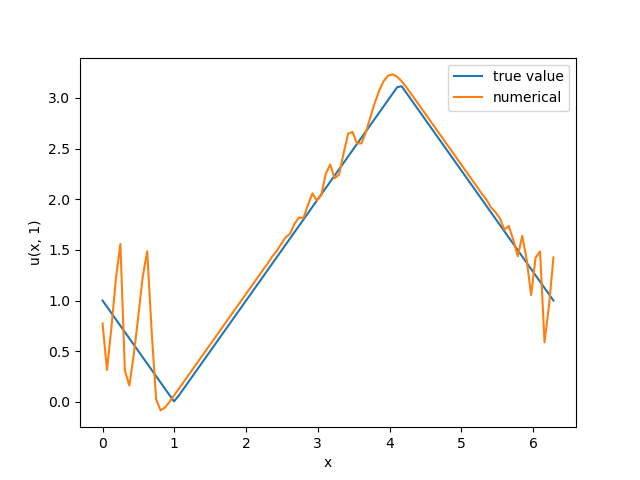

In [136]:
fig, ax = plt.subplots()
ax.plot(x, f(x - 1), label="true value")
ax.plot(x, u[-1], label="numerical")
ax.set_xlabel('x')
ax.set_ylabel('u(x, 1)')
ax.legend()
plt.show()

# Backward Euler Method

$$
\begin{align}
    v_j^{n+1} &= v_j^n + kD_0 v_j^{n+1} & j \in \mathbb Z, n \ge 0\\
    v_j^0 &= f_j & j \in \mathbb Z
\end{align}
$$

# Crank-Nicholson Method

$$
\begin{align}
    (I - \frac{k}{2} D_0) v_j^{n+1} &= (I + \frac{k}{2} D_0) v_j^n & j \in \mathbb Z, n \ge 0\\
    v_j^0 &= f_j & j \in \mathbb Z
\end{align}
$$